# Business/Use Case
- After performing the in-depth analysis of MongoDB, those functions will be demonstrated on other hand picked stocks.
- The process here is streamlined to pull the important information and best models for each stock in the demonstration.

# Forecasting Growth on Other Stocks
- Used examples of both positive and negative growth stocks
- They include:
    1. MongoDB (MDB)
        - MongoDB experienced significant growth over the last 3 years with the continued rise in the value of data. Could the models catch large spikes in growth?
    2. American Airlines (AAL)
        - The airline industry has suffered due to recent events.  Want to analyze what the next few months may look like for one major airline.
    3. Amazon (AMZN)
        - One of the most popular big tech companies which should be a safe bet to invest in.
    4. General Electric (GE)
        - GE has been on a steady decline over the years.  Using this stock as an example of potentially negative or no growth.
    5. Intel (INTC)
        - Intel has seen a lot of competition in the tech market as well.  Looking at how it may continue to be affected.
    6. Tesla (TSLA)
        - A very popular stock experiencing significant growth.  Would be interesting to analyze other data sources such as social media  and review its impact on this stock's price.

In [1]:
from Functions import *

In [2]:
# Container Variables for Results
stocks = ['American Airlines','Amazon','General Electric', 'Intel','Tesla', 'MongoDB']
models = []

In [3]:
aal = pd.read_csv('Data/AAL.csv')
amzn = pd.read_csv('Data/AMZN.csv')
ge = pd.read_csv('Data/GE.csv')
intc = pd.read_csv('Data/INTC.csv')
tsla = pd.read_csv('Data/TSLA.csv')
mdb = pd.read_csv('Data/MongoDB.csv')

# American Airlines

## Best Model

Returns: p, d, q
ARIMA Test RMSE:  11.365709622494357
Returns: p, d, q
ARIMA Test RMSE:  8.924438661392783
Auto Arima Test RMSE:  6.493396172773847
Auto Arima Test RMSE:  6.0916688635104
Prophet Test RMSE: 28.199373463885628
Logged Prophet Test RMSE: 14.747956256682585


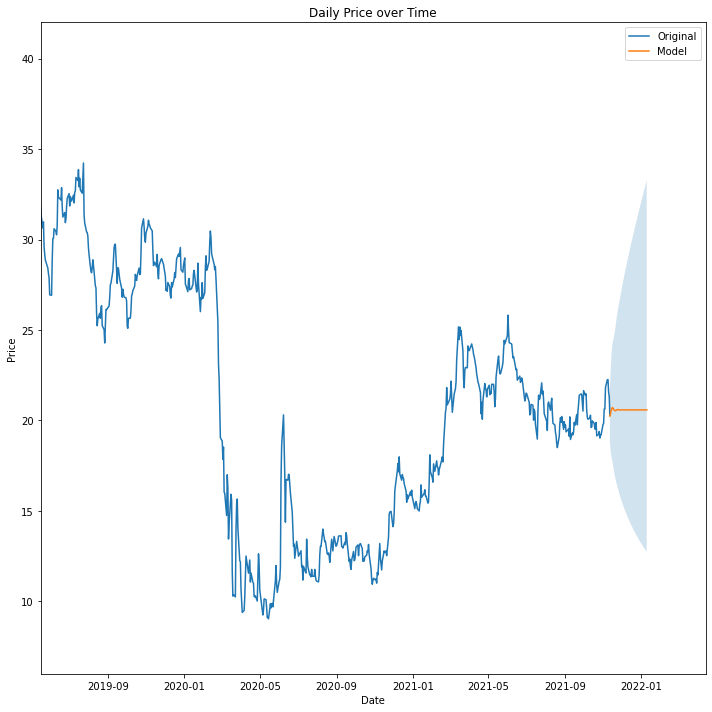

ROI:  1.68 %
Best Model: Logged_Auto_ARIMA


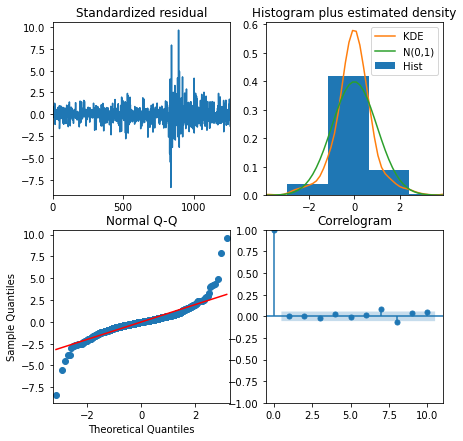

In [4]:
best_aal = best_model(aal, plotting=True)
models.append(best_aal)

In [5]:
best_aal.head()

,ARIMA,Logged_ARIMA,Auto_ARIMA,Logged_Auto_ARIMA,Prophet,Logged_Prophet,Best_Model,Best_RMSE,Expected_60day_Growth(%)
0,11.37,8.92,6.49,6.09,28.2,14.75,Logged_Auto_ARIMA,6.09,1.68


# Amazon

## Best Model

Returns: p, d, q
ARIMA Test RMSE:  335.37145274496186
Returns: p, d, q
ARIMA Test RMSE:  936.7865112799977
Auto Arima Test RMSE:  333.2338199023155
Auto Arima Test RMSE:  933.7324232003156
Prophet Test RMSE: 746.3832855026207
Logged Prophet Test RMSE: 1918.6492756259152


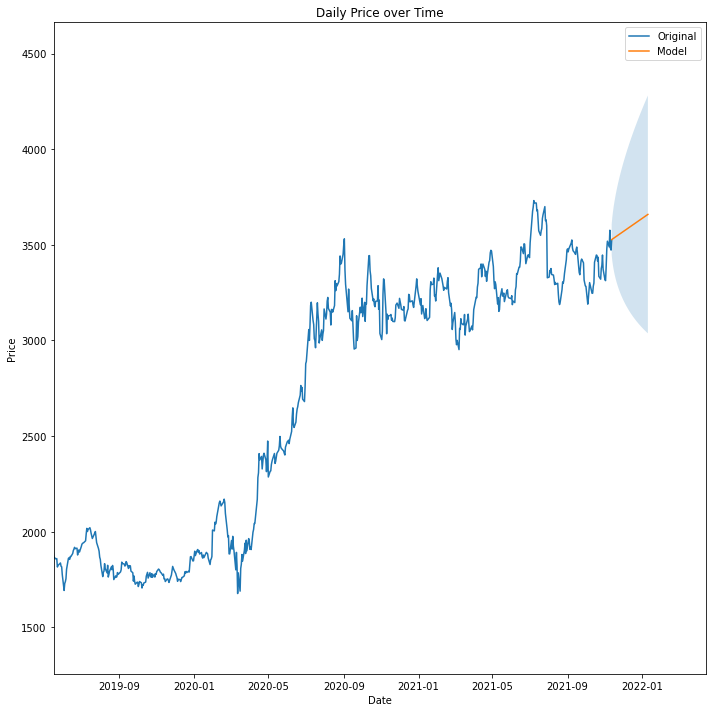

ROI:  3.73 %
Best Model: Auto_ARIMA


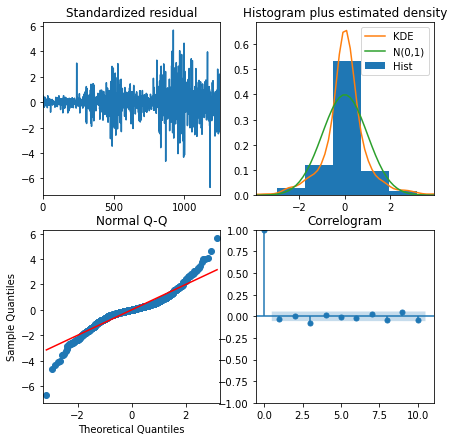

In [6]:
best_amzn = best_model(amzn,plotting=True)
models.append(best_amzn)

# General Electric

## Best Model

Returns: p, d, q
ARIMA Test RMSE:  74.04947673615601
Returns: p, d, q
ARIMA Test RMSE:  55.01813299395058
Auto Arima Test RMSE:  74.04480837067062
Auto Arima Test RMSE:  55.07069358965366
Prophet Test RMSE: 97.25108398415385
Logged Prophet Test RMSE: 59.02979594648951
Returns: p, d, q


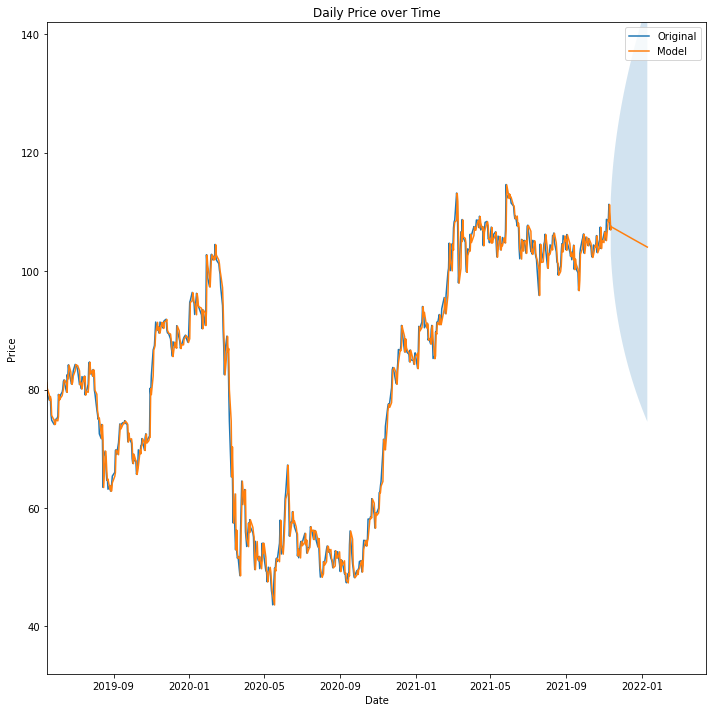

ROI:  -3.23 %
Best Model: Logged_ARIMA


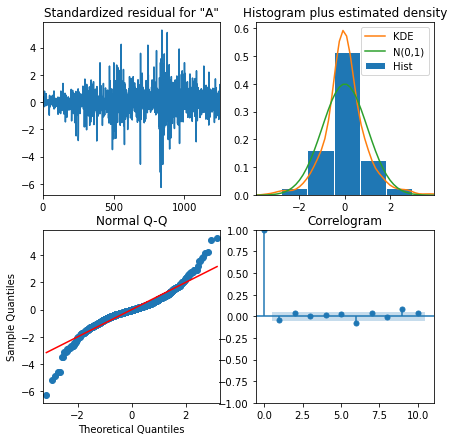

In [7]:
best_ge = best_model(ge,plotting=True)
models.append(best_ge)

# Intel

## Best Model

Returns: p, d, q
ARIMA Test RMSE:  6.487104285918575
Returns: p, d, q
ARIMA Test RMSE:  5.794795624994909
Auto Arima Test RMSE:  7.977109747974804
Auto Arima Test RMSE:  7.985860625638707
Prophet Test RMSE: 6.442102234468254
Logged Prophet Test RMSE: 6.2586874254655305
Returns: p, d, q


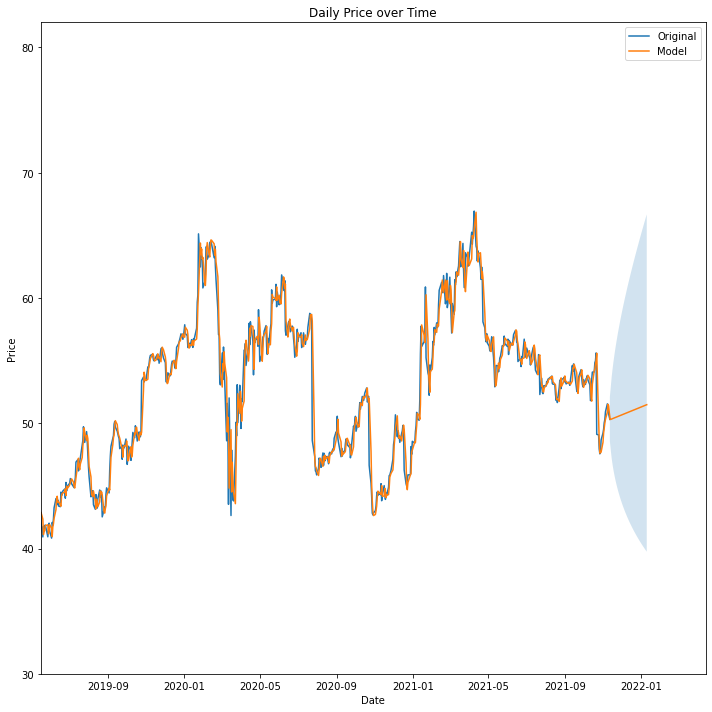

ROI:  2.33 %
Best Model: Logged_ARIMA


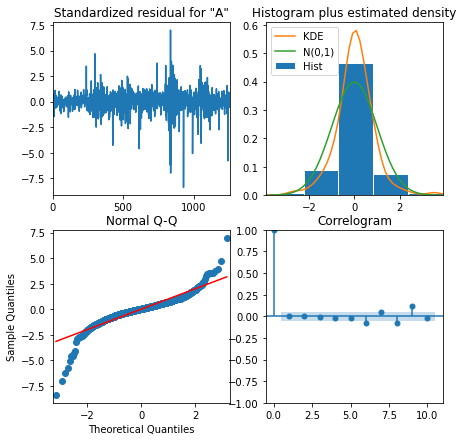

In [8]:
best_intc = best_model(intc,plotting=True)
models.append(best_intc)

# Tesla

## Best Model

Returns: p, d, q
ARIMA Test RMSE:  319.78347341876986
Returns: p, d, q
ARIMA Test RMSE:  210.92099542311496
Auto Arima Test RMSE:  138.17489392543104
Auto Arima Test RMSE:  225.7631349763984
Prophet Test RMSE: 254.49099160733334
Logged Prophet Test RMSE: 1098.8272205362439


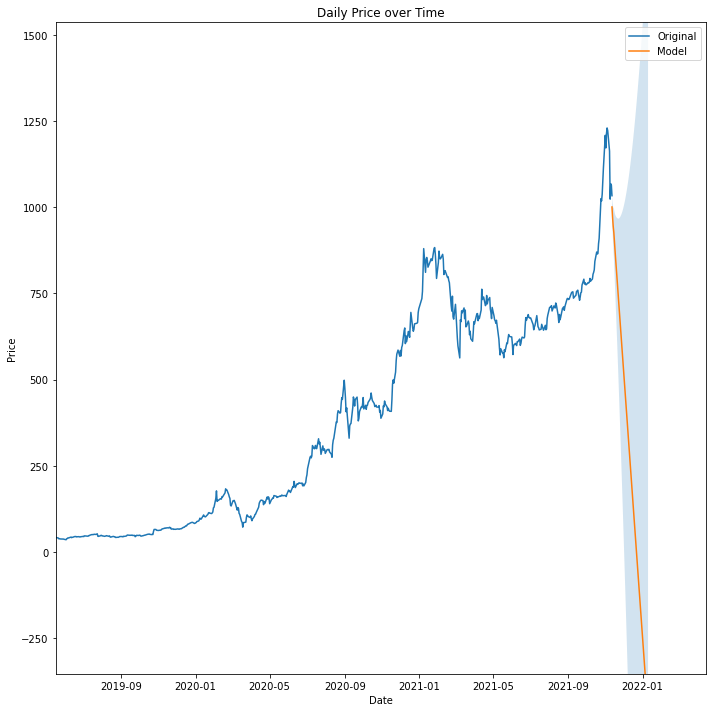

ROI:  -147.13 %
Best Model: Auto_ARIMA


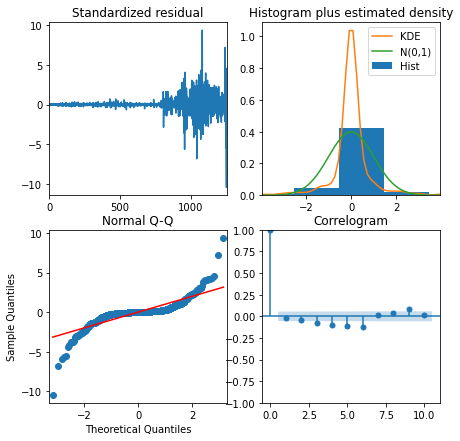

In [9]:
best_tsla = best_model(tsla,plotting=True)
models.append(best_tsla)

Returns: p, d, q


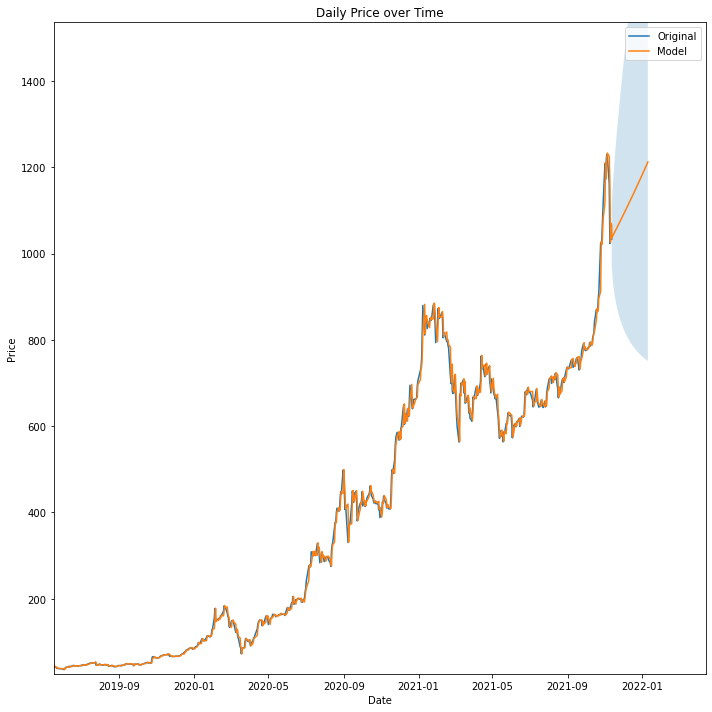

ROI:  17.01 %


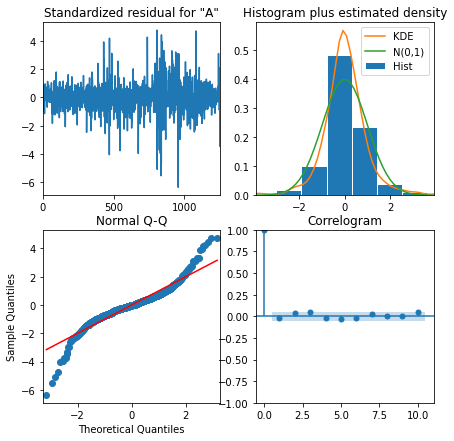

In [10]:
# The best auto_arima model here appears off, using the next best model
base_model(tsla,exog=True,logged=True,plotting=True, full=True, roi=True)

# Findings

## Merging Results into a Data Frame

In [11]:
# adding Mongo DB to results
best_mongo = best_model(mdb)
models.append(best_mongo)

Returns: p, d, q
ARIMA Test RMSE:  92.10970700146592
Returns: p, d, q
ARIMA Test RMSE:  58.08241838017868
Auto Arima Test RMSE:  92.40403475573405
Auto Arima Test RMSE:  58.022142322809934
Prophet Test RMSE: 65.78887755293908
Logged Prophet Test RMSE: 369.84401898575334
ROI:  17.41 %
Best Model: Logged_Auto_ARIMA


In [12]:
full_data = models[0].copy()

In [13]:
for i in range(1,len(models)):
    full_data = full_data.append(models[i])

In [14]:
full_data

,ARIMA,Logged_ARIMA,Auto_ARIMA,Logged_Auto_ARIMA,Prophet,Logged_Prophet,Best_Model,Best_RMSE,Expected_60day_Growth(%)
0,11.37,8.92,6.49,6.09,28.2,14.75,Logged_Auto_ARIMA,6.09,1.68
0,335.37,936.79,333.23,933.73,746.38,1918.65,Auto_ARIMA,333.23,3.73
0,74.05,55.02,74.04,55.07,97.25,59.03,Logged_ARIMA,55.02,-3.23
0,6.49,5.79,7.98,7.99,6.44,6.26,Logged_ARIMA,5.79,2.33
0,319.78,210.92,138.17,225.76,254.49,1098.83,Auto_ARIMA,138.17,-147.13
0,92.11,58.08,92.4,58.02,65.79,369.84,Logged_Auto_ARIMA,58.02,17.41


In [15]:
full_data['Stocks']=stocks
full_data['Expected_60day_Growth(%)'] = full_data['Expected_60day_Growth(%)'].astype(float)
table = full_data.set_index('Stocks')
table.head()

,ARIMA,Logged_ARIMA,Auto_ARIMA,Logged_Auto_ARIMA,Prophet,Logged_Prophet,Best_Model,Best_RMSE,Expected_60day_Growth(%)
Stocks,,,,,,,,,
American Airlines,11.37,8.92,6.49,6.09,28.2,14.75,Logged_Auto_ARIMA,6.09,1.68
Amazon,335.37,936.79,333.23,933.73,746.38,1918.65,Auto_ARIMA,333.23,3.73
General Electric,74.05,55.02,74.04,55.07,97.25,59.03,Logged_ARIMA,55.02,-3.23
Intel,6.49,5.79,7.98,7.99,6.44,6.26,Logged_ARIMA,5.79,2.33
Tesla,319.78,210.92,138.17,225.76,254.49,1098.83,Auto_ARIMA,138.17,-147.13


In [18]:
table.loc['Tesla','Expected_60day_Growth(%)'] = 17.01
table.head()

,ARIMA,Logged_ARIMA,Auto_ARIMA,Logged_Auto_ARIMA,Prophet,Logged_Prophet,Best_Model,Best_RMSE,Expected_60day_Growth(%)
Stocks,,,,,,,,,
American Airlines,11.37,8.92,6.49,6.09,28.2,14.75,Logged_Auto_ARIMA,6.09,1.68
Amazon,335.37,936.79,333.23,933.73,746.38,1918.65,Auto_ARIMA,333.23,3.73
General Electric,74.05,55.02,74.04,55.07,97.25,59.03,Logged_ARIMA,55.02,-3.23
Intel,6.49,5.79,7.98,7.99,6.44,6.26,Logged_ARIMA,5.79,2.33
Tesla,319.78,210.92,138.17,225.76,254.49,1098.83,Auto_ARIMA,138.17,17.01


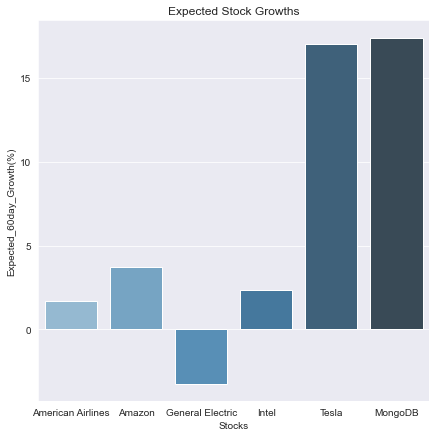

In [20]:
figure = plt.figure(figsize=(7,7))
sns.set_style('darkgrid')
sns.barplot(x=table.index,y=table['Expected_60day_Growth(%)'], palette='Blues_d')
plt.title('Expected Stock Growths')
plt.show();

In [19]:
table.reset_index()

,Stocks,ARIMA,Logged_ARIMA,Auto_ARIMA,Logged_Auto_ARIMA,Prophet,Logged_Prophet,Best_Model,Best_RMSE,Expected_60day_Growth(%)
0,American Airlines,11.37,8.92,6.49,6.09,28.2,14.75,Logged_Auto_ARIMA,6.09,1.68
1,Amazon,335.37,936.79,333.23,933.73,746.38,1918.65,Auto_ARIMA,333.23,3.73
2,General Electric,74.05,55.02,74.04,55.07,97.25,59.03,Logged_ARIMA,55.02,-3.23
3,Intel,6.49,5.79,7.98,7.99,6.44,6.26,Logged_ARIMA,5.79,2.33
4,Tesla,319.78,210.92,138.17,225.76,254.49,1098.83,Auto_ARIMA,138.17,17.01
5,MongoDB,92.11,58.08,92.4,58.02,65.79,369.84,Logged_Auto_ARIMA,58.02,17.41


## Results
- Tesla has the highest growth in 60 days with MongoDB a close second.
- Prophet never performed the best, but came close in a few instances
- I think parameters in prophet can be improved to better fit the data